In [1]:
from ensemble_functions import *

In [2]:
training_data = pd.read_parquet('training_data.parquet')
training_data.head()

,año,mes,dia,hora,dia_semana,holiday,temperature_2m,rain,relative_humidity_2m,snowfall,Bronx,Brooklyn,Manhattan,Queens,Staten Island
datetime,,,,,,,,,,,,,,,
2022-01-01 00:00:00,2022,1,1,0,6,1,8.508500,0.0,97.987221,0.0,1648,3059,6292,2419,187
2022-01-01 01:00:00,2022,1,1,1,6,1,9.308500,0.0,95.387932,0.0,1758,3124,6222,2519,193
2022-01-01 02:00:00,2022,1,1,2,6,1,8.158501,0.0,97.981651,0.0,1685,3125,5969,2316,231
2022-01-01 03:00:00,2022,1,1,3,6,1,8.208500,0.0,99.323456,0.0,1510,2872,5553,2111,209
2022-01-01 04:00:00,2022,1,1,4,6,1,7.808500,0.0,100.000000,0.0,1266,2345,4141,1792,144


In [3]:
ensemble, ensemble_predictions, ensemble_errors, ponderacion = train_ensemble(data=training_data, verbose=1, file='ensemble_1.joblib')

Comienzo del entrenamiento del ensemble
Inicio de construcción modelo LSTM


88/88 [==============================] - 1s 3ms/step
Finalizada la construcción de LSTM
RMSE por distrito:
{'Bronx': 76.67402542421785, 'Brooklyn': 155.29045339573446, 'Manhattan': 368.2116142763527, 'Queens': 153.77961647653458, 'Staten Island': 18.117299737513736}
Inicio de construcción modelo RF
Inicio de evaluación de Bronx
Mejores Hiperparámetros: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
RMSE: 71.80191009824394
-----------------------------------------------------------------------------------------
Inicio de evaluación de Brooklyn
Mejores Hiperparámetros: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
RMSE: 139.2640992267625
-----------------------------------------------------------------------------------------
Inicio de evaluación de Manhattan
Mejores Hiperparámetros: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
RMSE: 259.85328866471514
------

INFO:tensorflow:Assets written to: C:\Users\alter\AppData\Local\Temp\tmp3wvu9g3b\assets


Ponderacion: lineal
110/110 [==============================] - 0s 3ms/step
Distrito: Bronx
RMSE: 92.60173414168572
Distrito: Brooklyn
RMSE: 171.09714135691664
Distrito: Manhattan
RMSE: 379.05800271176736
Distrito: Queens
RMSE: 166.06868269946412
Distrito: Staten Island
RMSE: 18.24691715633638
Ponderacion: exp Alpha: 0.01
110/110 [==============================] - 0s 3ms/step
Distrito: Bronx
RMSE: 92.37463794436738
Distrito: Brooklyn
RMSE: 170.05249597142148
Distrito: Manhattan
RMSE: 384.81929484209405
Distrito: Queens
RMSE: 163.7213117010603
Distrito: Staten Island
RMSE: 18.246149668023566
Ponderacion: exp Alpha: 0.1
110/110 [==============================] - 0s 3ms/step
Distrito: Bronx
RMSE: 89.923965214301
Distrito: Brooklyn
RMSE: 168.07743030484312
Distrito: Manhattan
RMSE: 417.4150460429602
Distrito: Queens
RMSE: 147.72170234342997
Distrito: Staten Island
RMSE: 18.235479802717677
Ponderacion: exp Alpha: 0.5
110/110 [==============================] - 0s 3ms/step
Distrito: Bronx
RMSE

In [38]:
ponderacion

{'tipo': 'exp', 'alpha': 0.1}

In [17]:
ensemble_data = {'ensemble': ensemble, 'ensemble_predictions': ensemble_predictions, 'ensemble_errors': ensemble_errors, 'ponderacion': ponderacion}
dump(ensemble_data, 'ensemble_1_complete.joblib')

INFO:tensorflow:Assets written to: C:\Users\alter\AppData\Local\Temp\tmpokgj8yww\assets


INFO:tensorflow:Assets written to: C:\Users\alter\AppData\Local\Temp\tmpokgj8yww\assets


['ensemble_1_complete.joblib']

In [6]:
pred = ensemble_predictions['exp'][0.1]

In [15]:
def graficar_pred_ensemble(pred, numero_dias=5):
    
    for district in pred.keys():
        plt.figure(figsize=(12,12))
        sns.set_style('darkgrid')
        sns.lineplot(pred[district]['Predicted'][:24*numero_dias], label='Predicted values', color='blue')
        sns.lineplot(pred[district]['Real values'][:24*numero_dias], label='Real values', color='green')
        plt.title(f'Pedicciones de demanda en {district} utilizando Weighted Ensemble', fontsize=14)
        plt.xlabel('Fecha-hora', fontsize=12)
        plt.ylabel('Demanda', fontsize=12)
        plt.legend(fontsize=10)
        plt.tight_layout()
        plt.show()

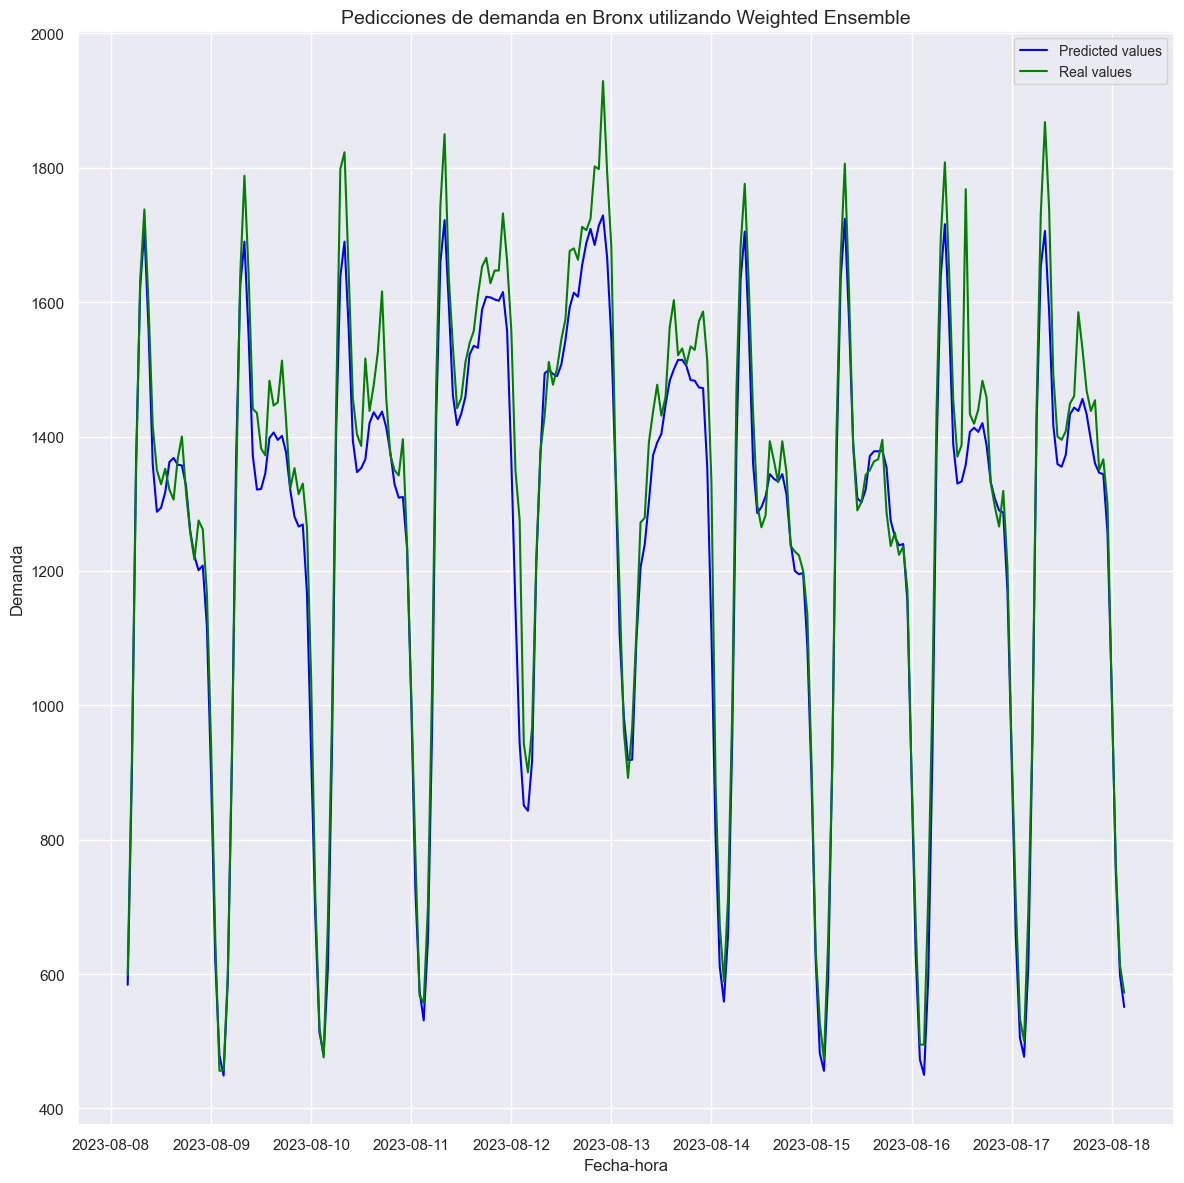

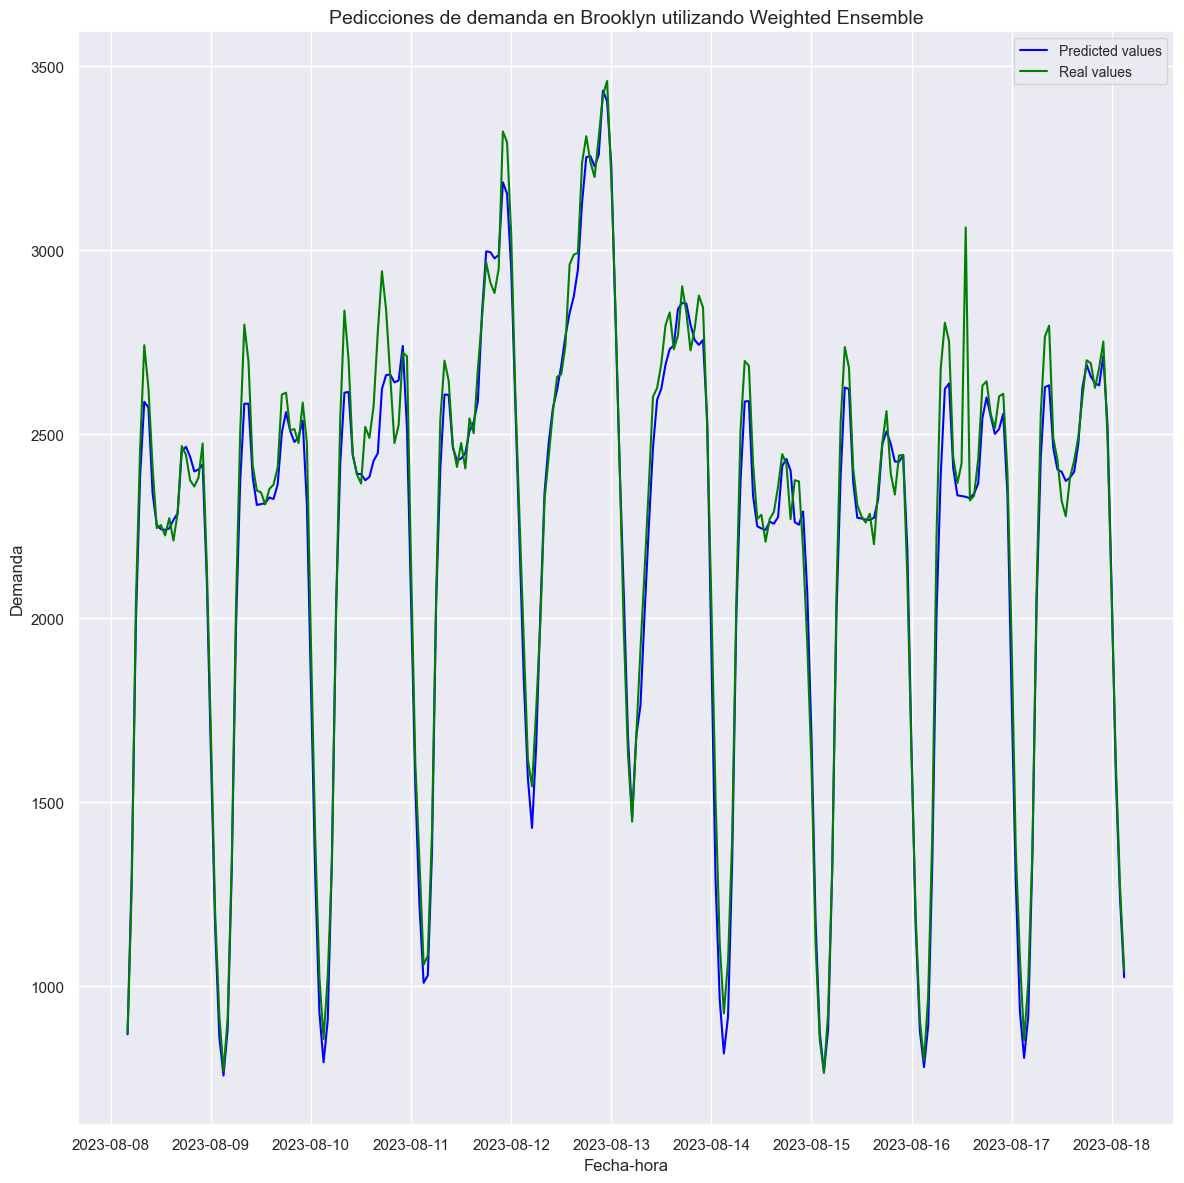

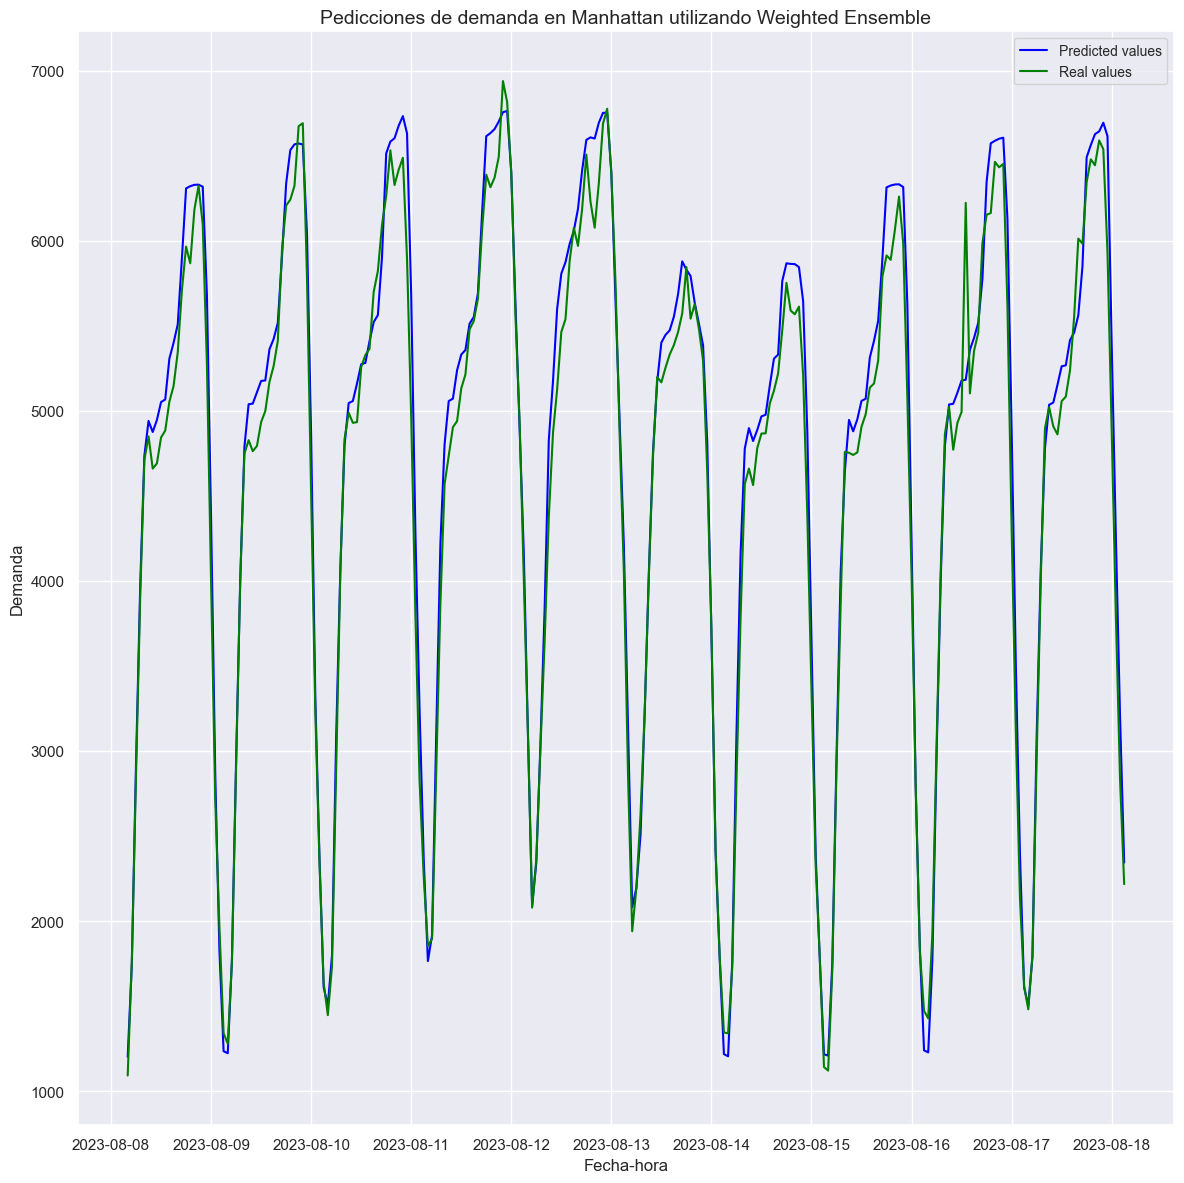

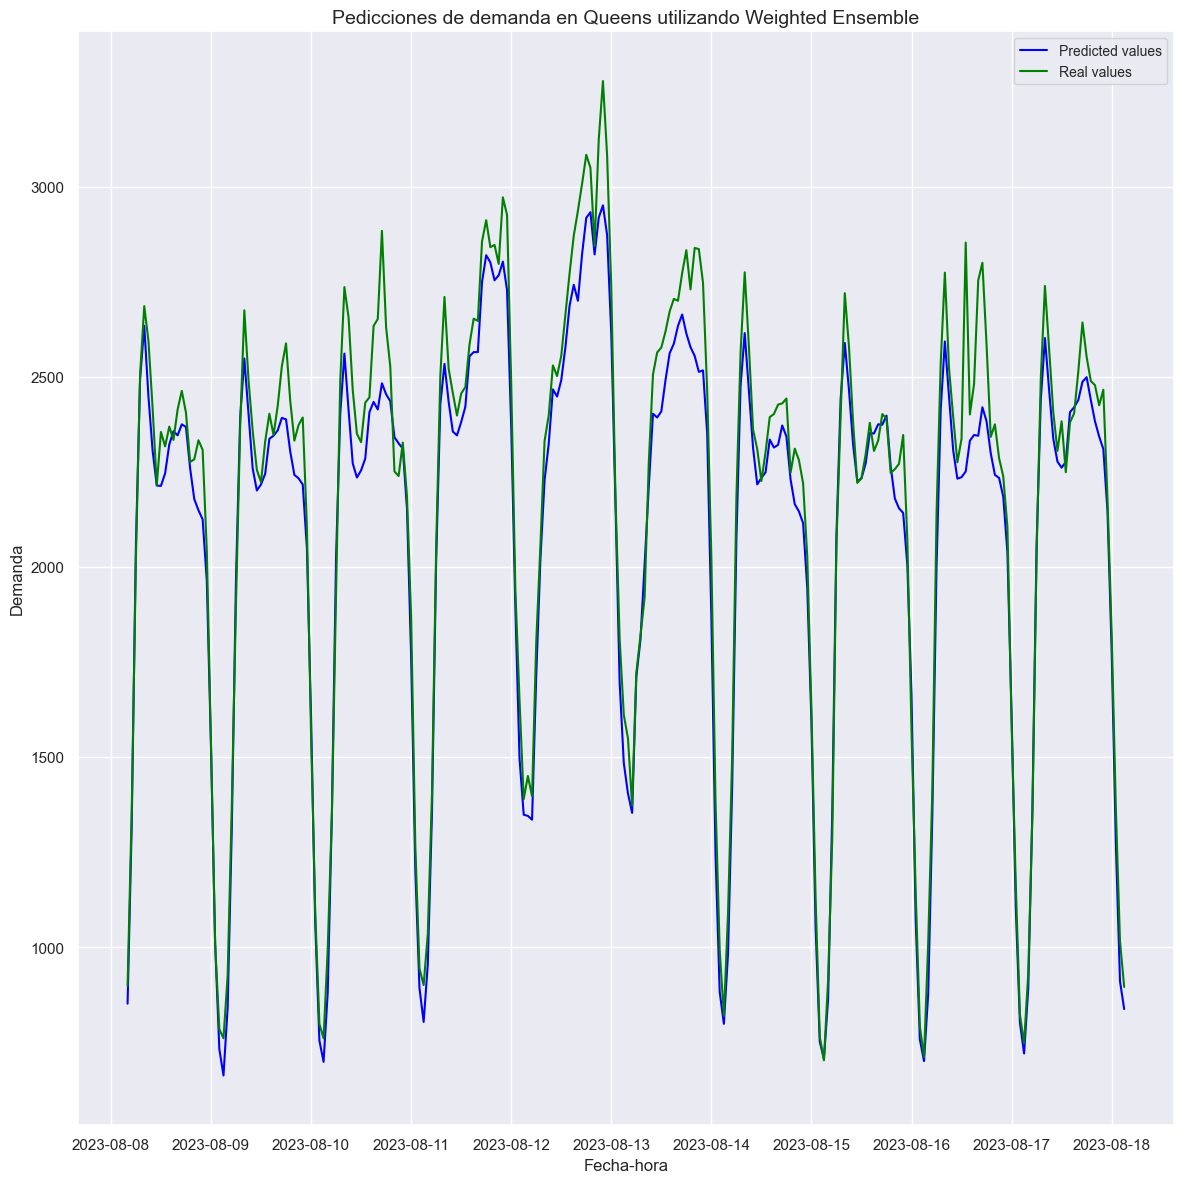

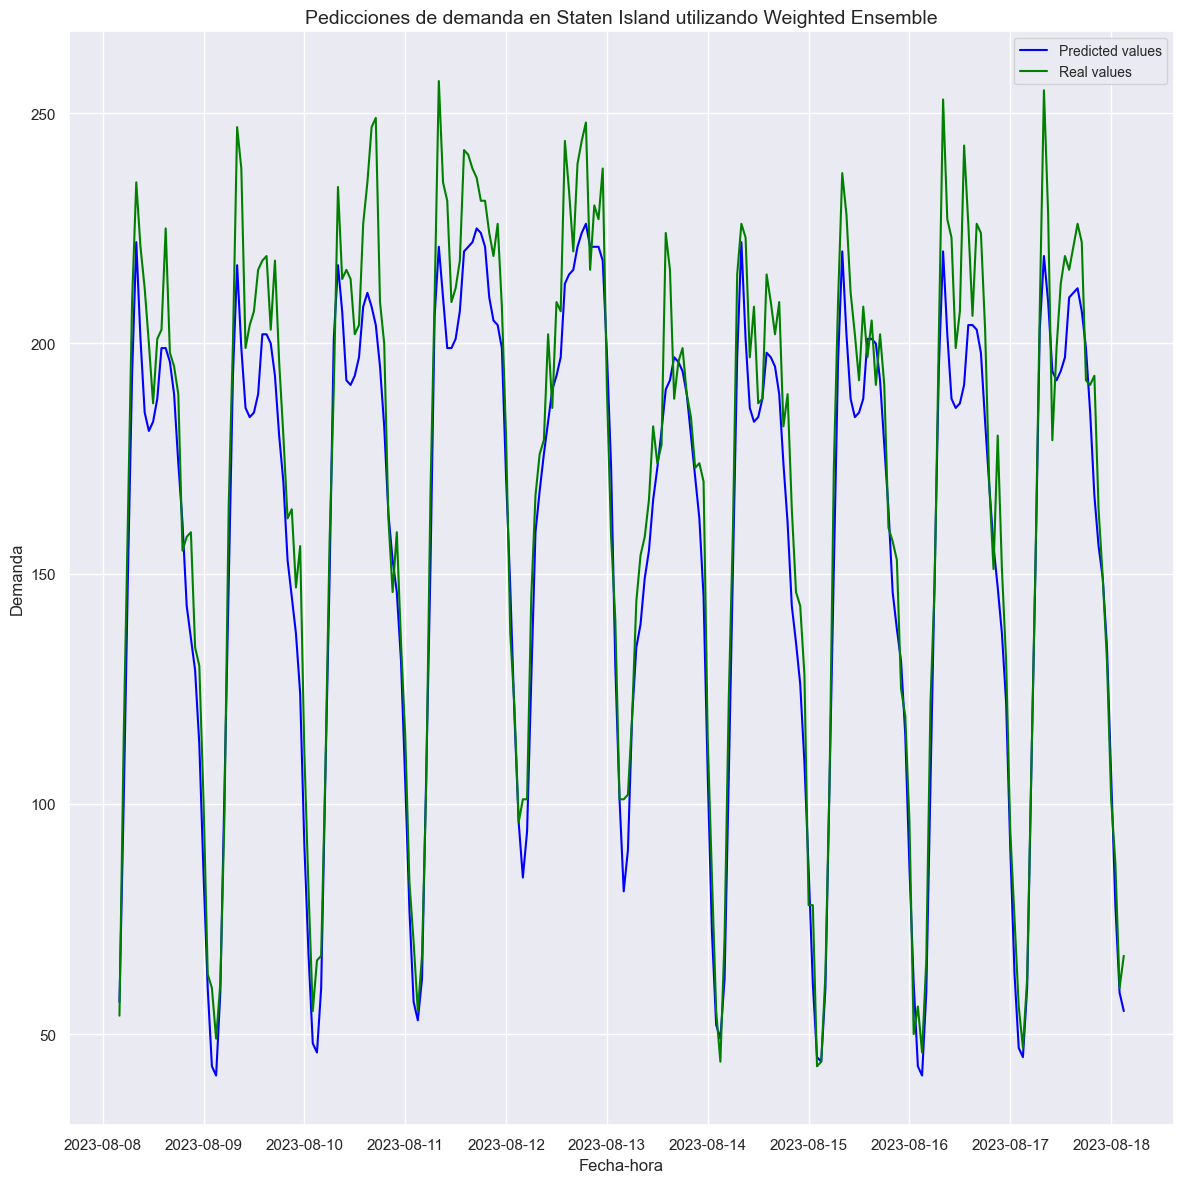

In [16]:
graficar_pred_ensemble(pred, 10)

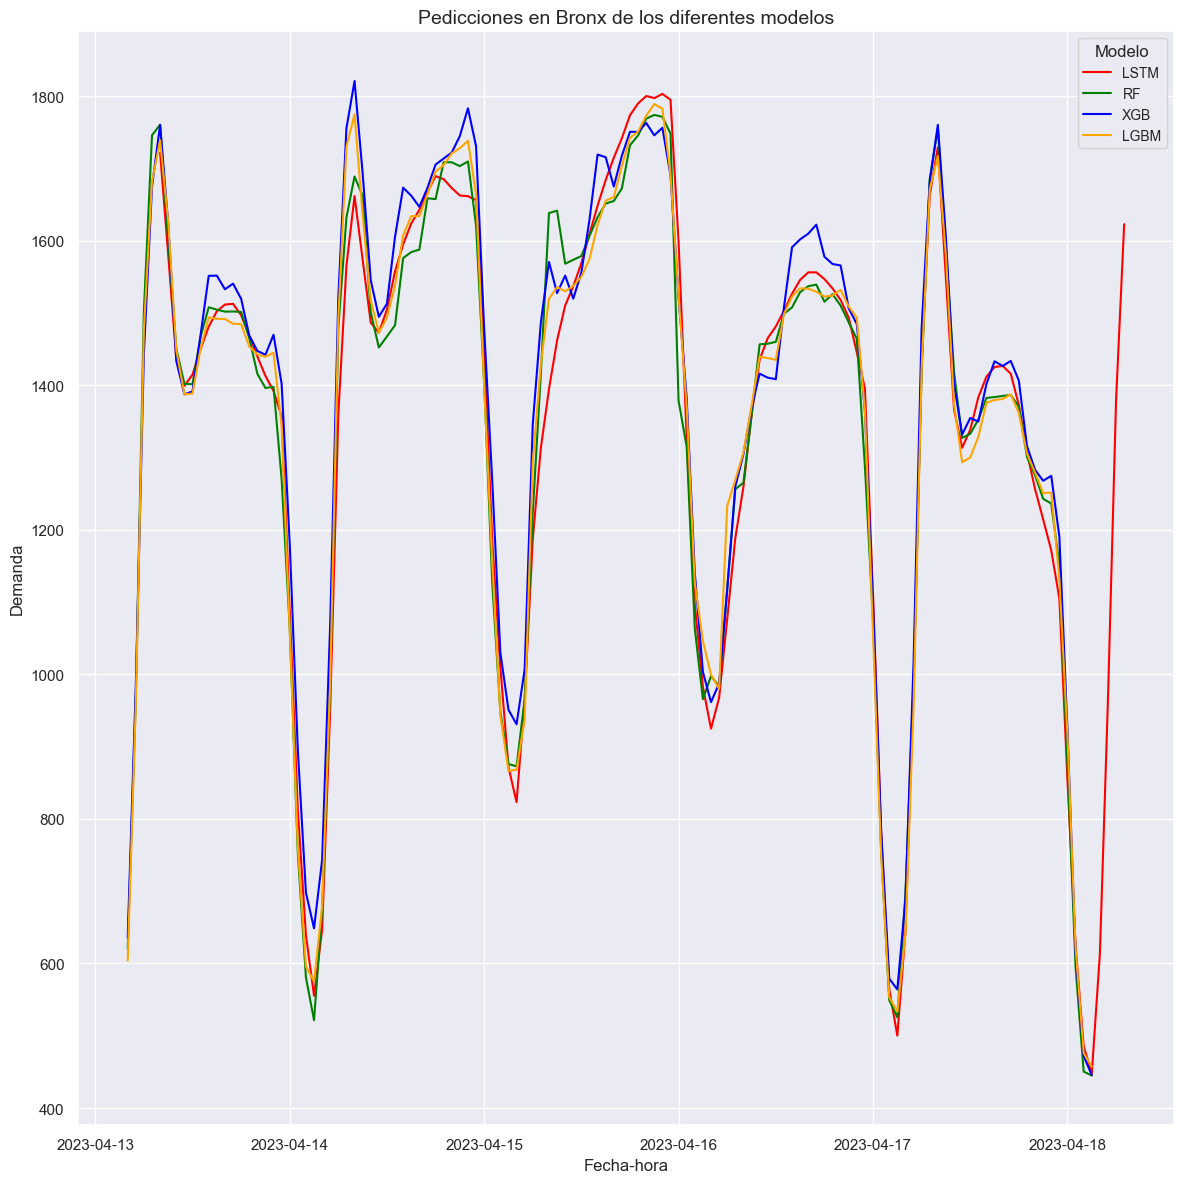

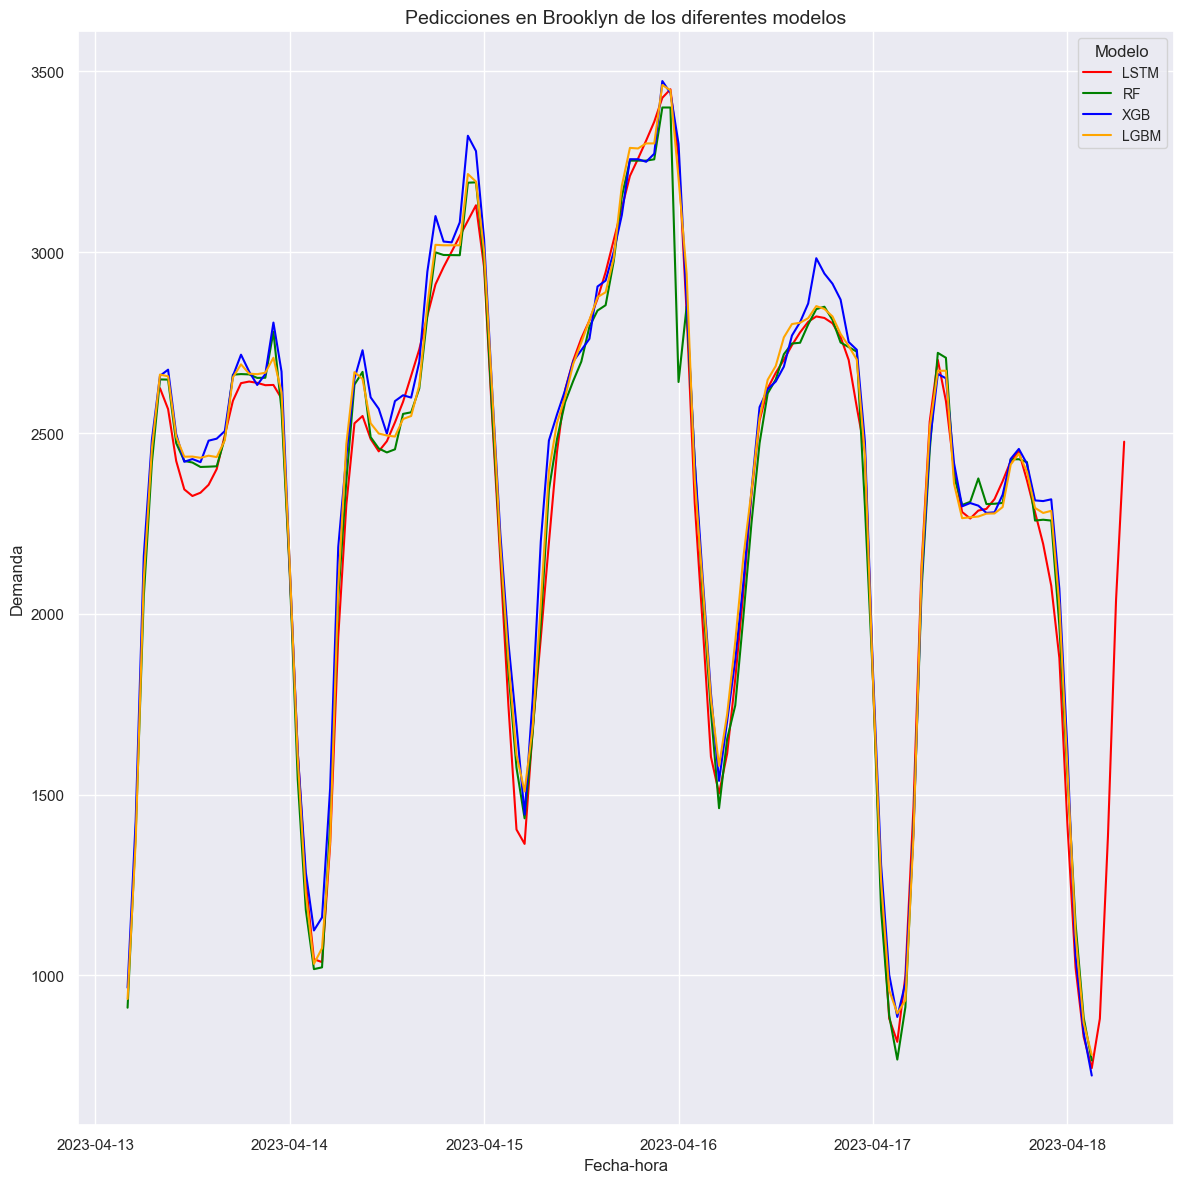

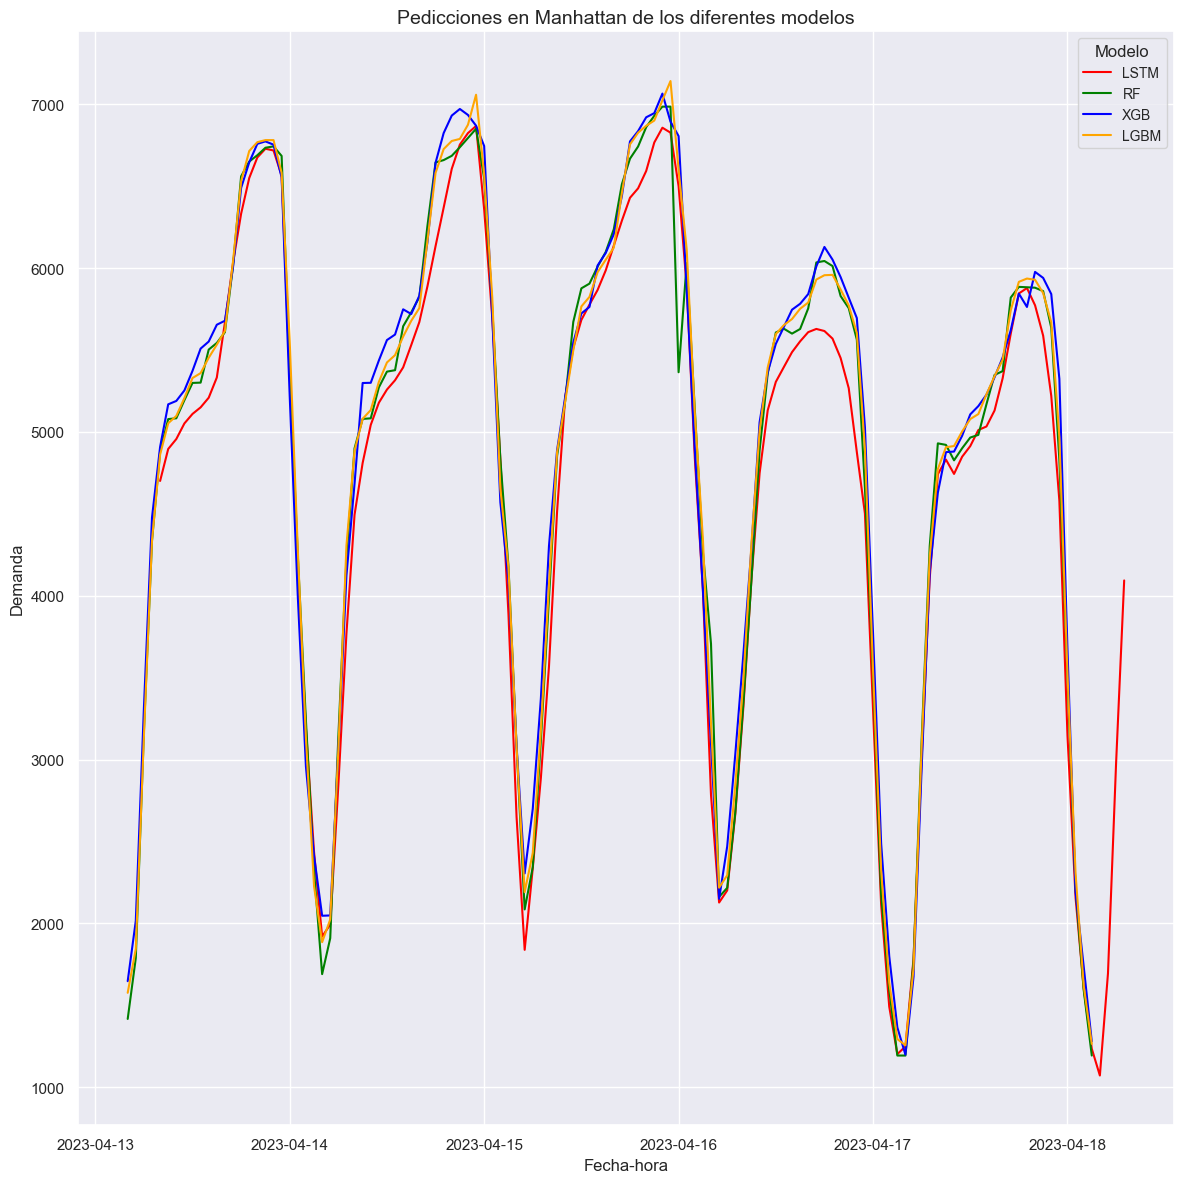

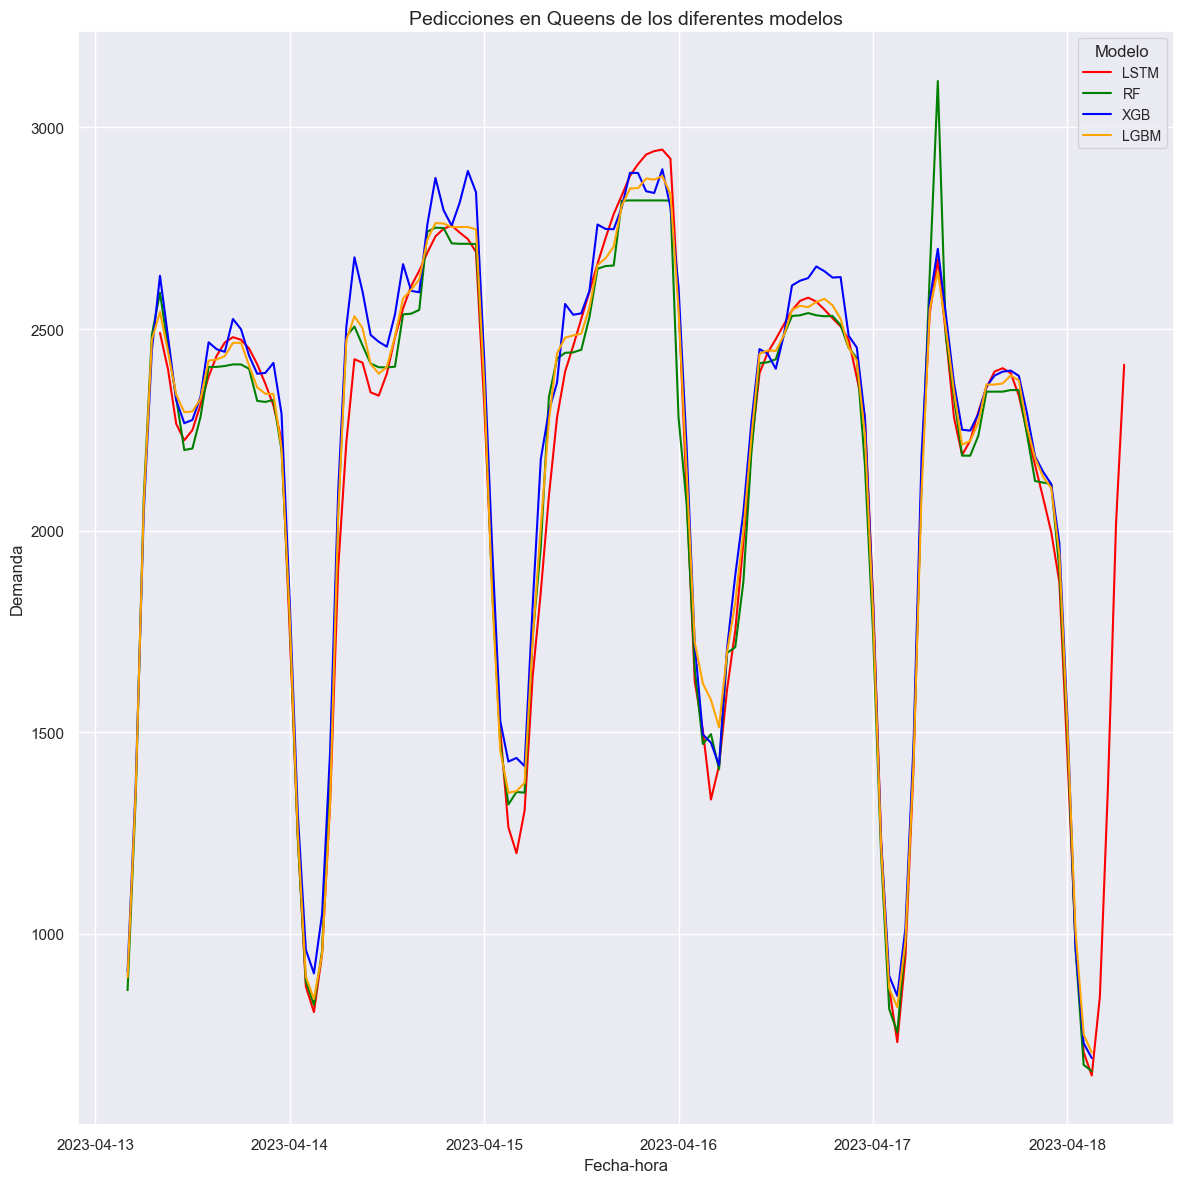

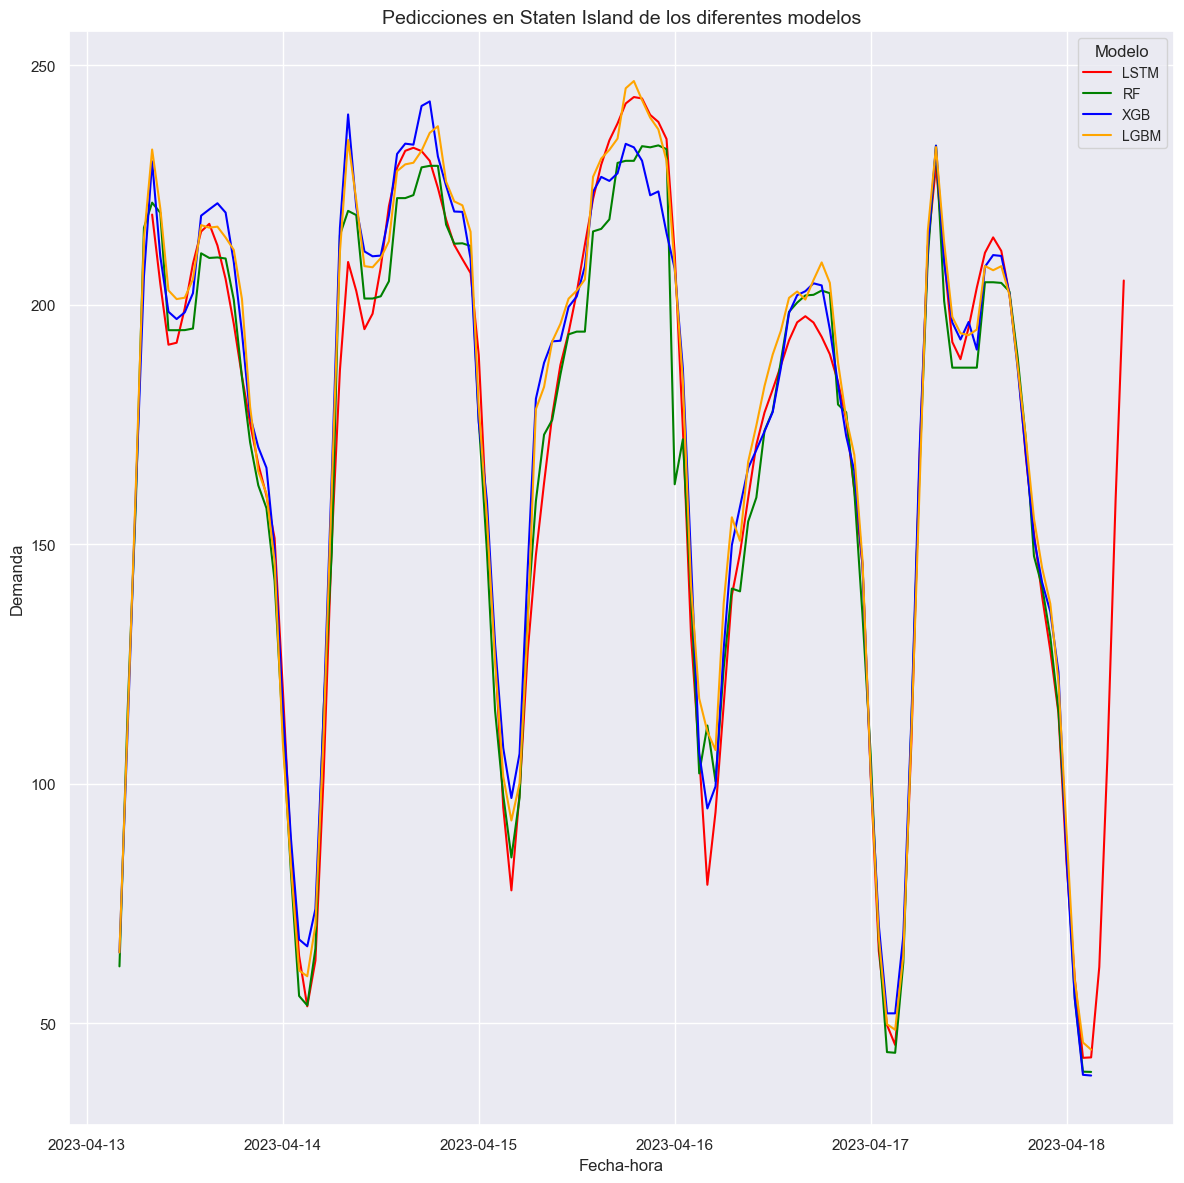

In [32]:
numero_dias = 5
pred_modelos = ensemble['test_predictions']
districts = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
for district in districts:
        
        plt.figure(figsize=(12,12))
        sns.set_style('darkgrid')
        sns.lineplot(pred_modelos['lstm'][district]['Predicted'][:numero_dias*24], label='LSTM', color='red')
        sns.lineplot(pred_modelos['rf'][district]['Predicted'][:numero_dias*24], label='RF', color='green')
        sns.lineplot(pred_modelos['xgb'][district]['Predicted'][:numero_dias*24], label='XGB', color='blue')
        sns.lineplot(pred_modelos['lgbm'][district]['Predicted'][:numero_dias*24], label='LGBM', color='orange')
        plt.title(f'Pedicciones en {district} de los diferentes modelos', fontsize=14)
        plt.xlabel('Fecha-hora', fontsize=12)
        plt.ylabel('Demanda', fontsize=12)
        plt.legend(title='Modelo', fontsize=10, title_fontsize='12')
        plt.tight_layout()
        plt.show()

In [36]:
nyc_pred = predecir(ensemble, ponderacion='exp', alpha=0.1)

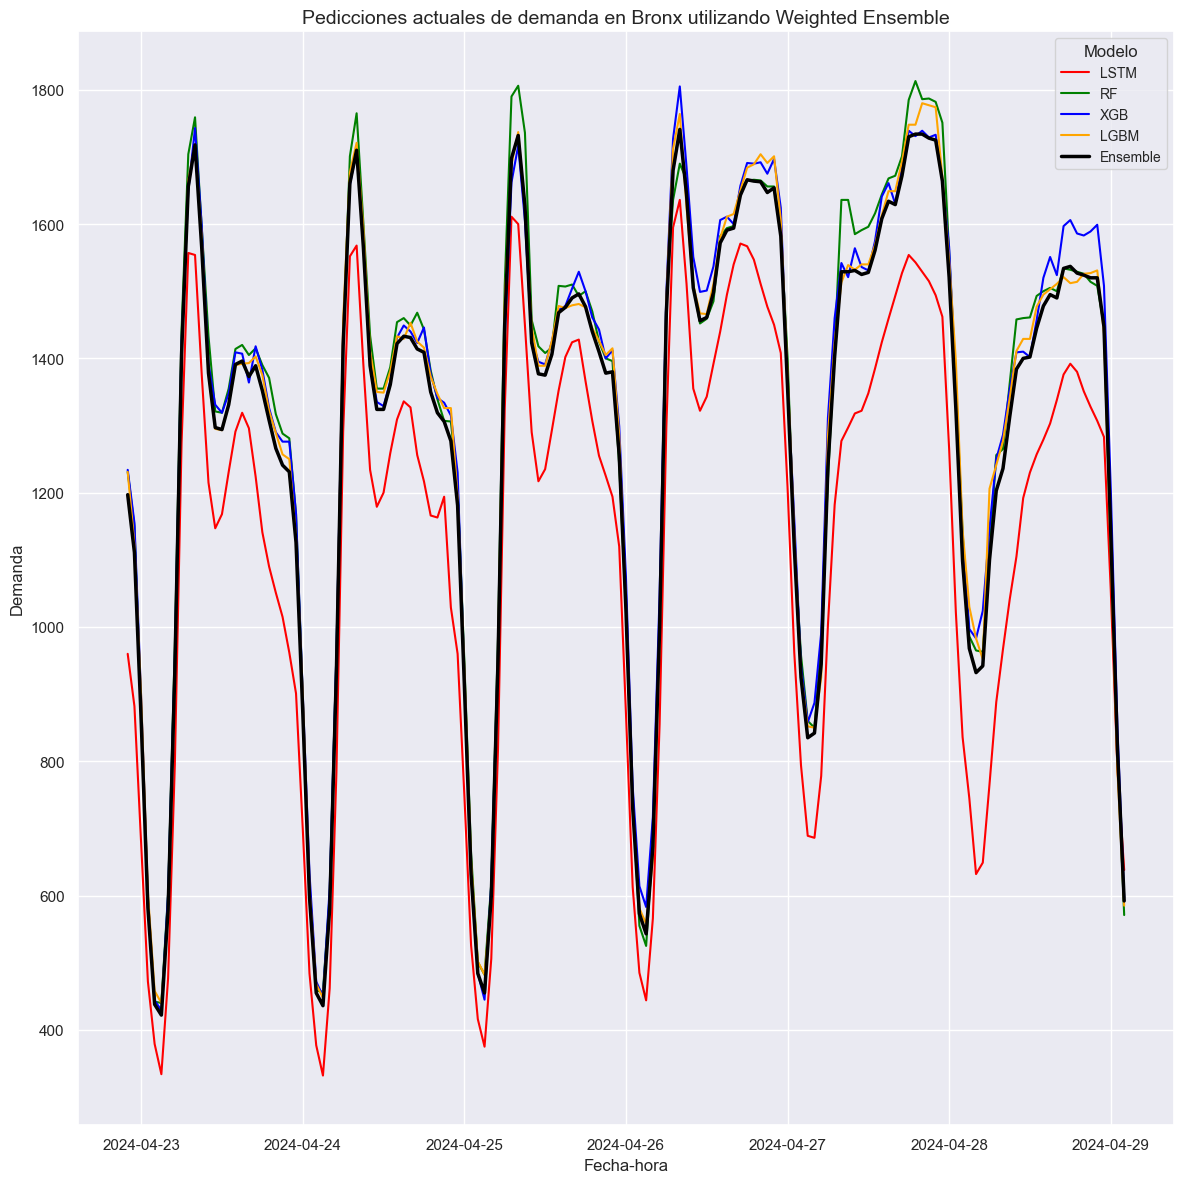

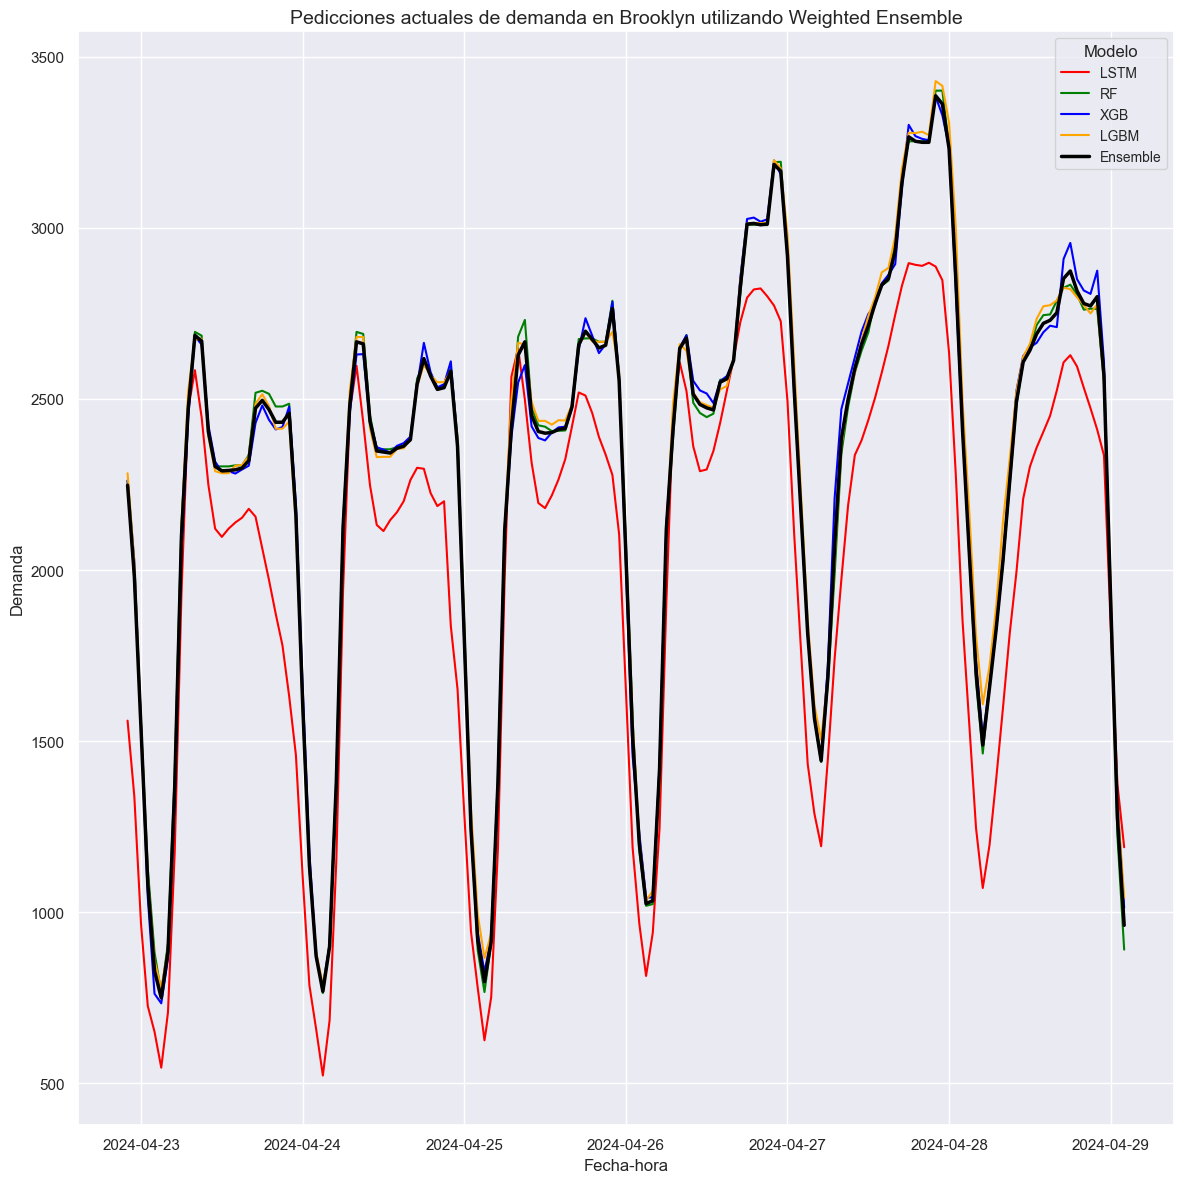

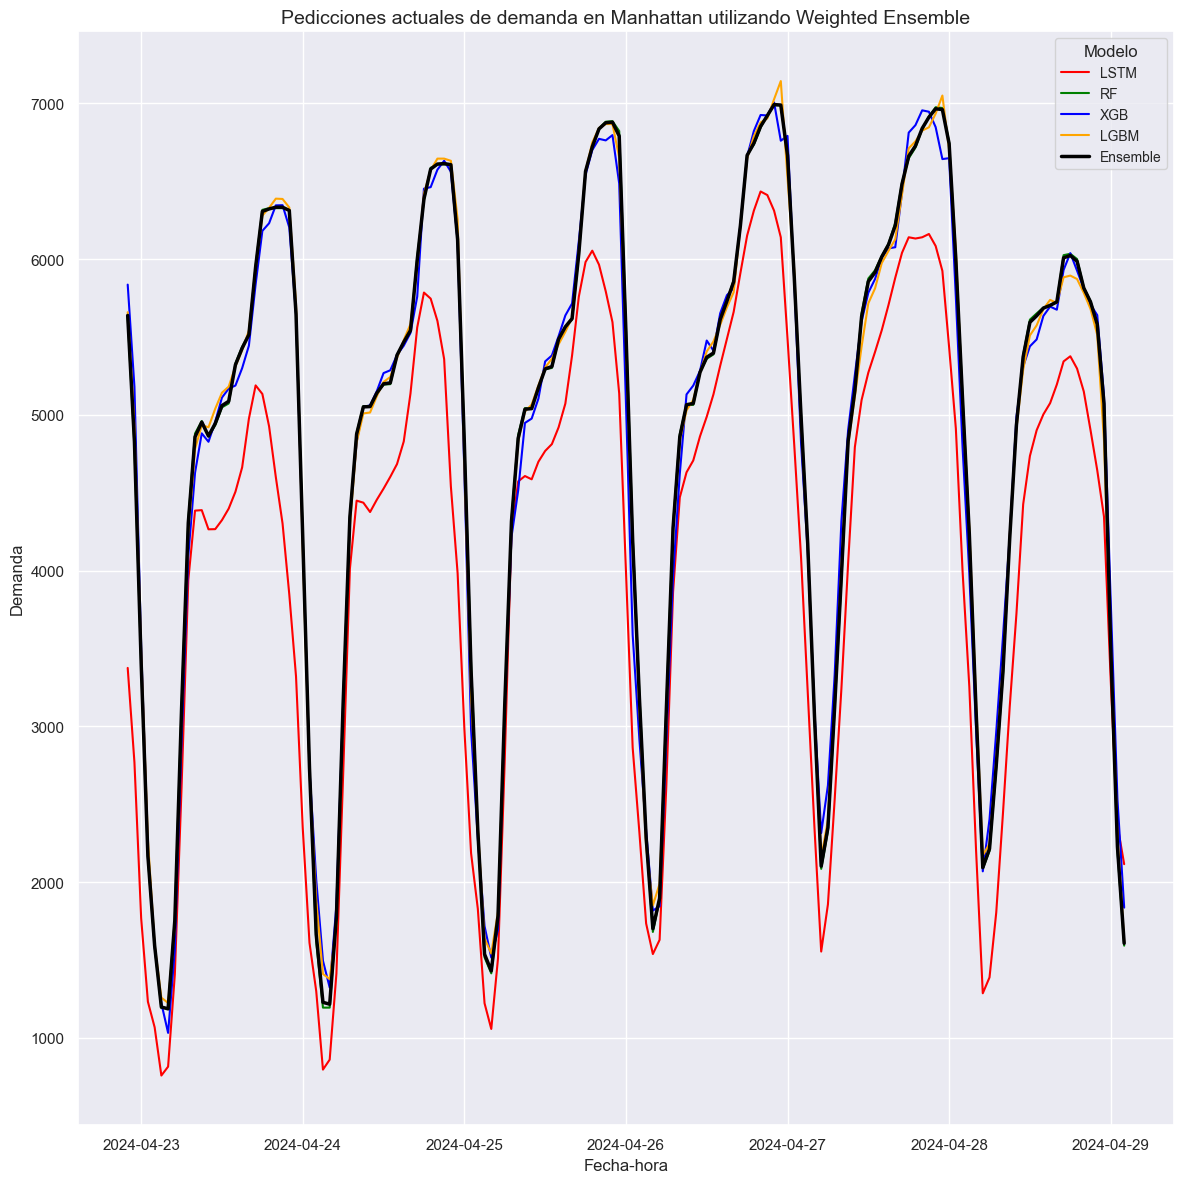

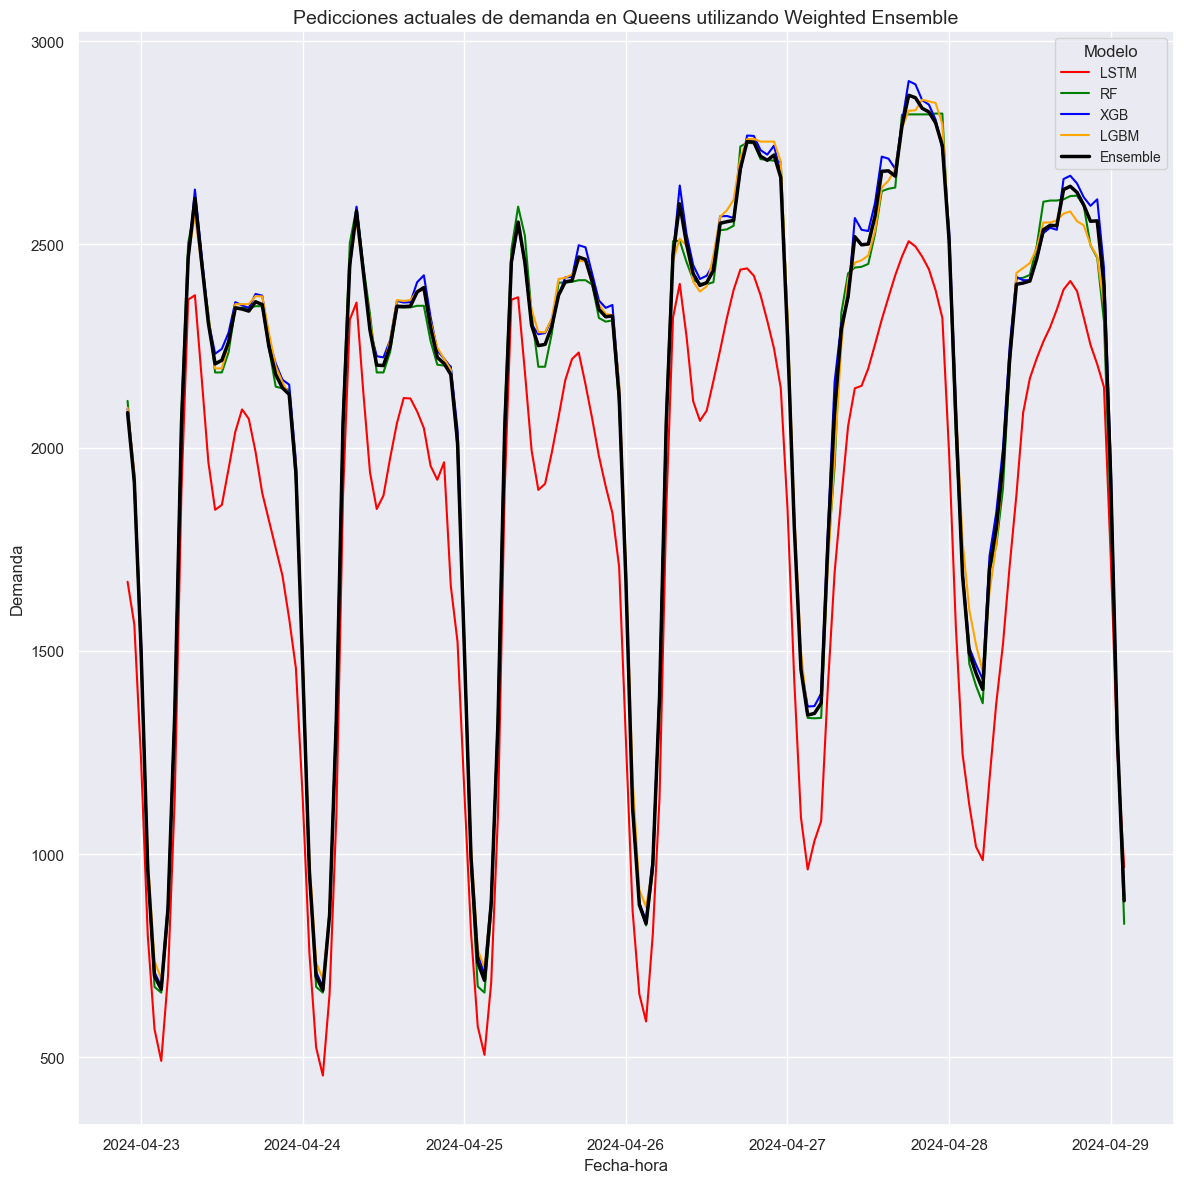

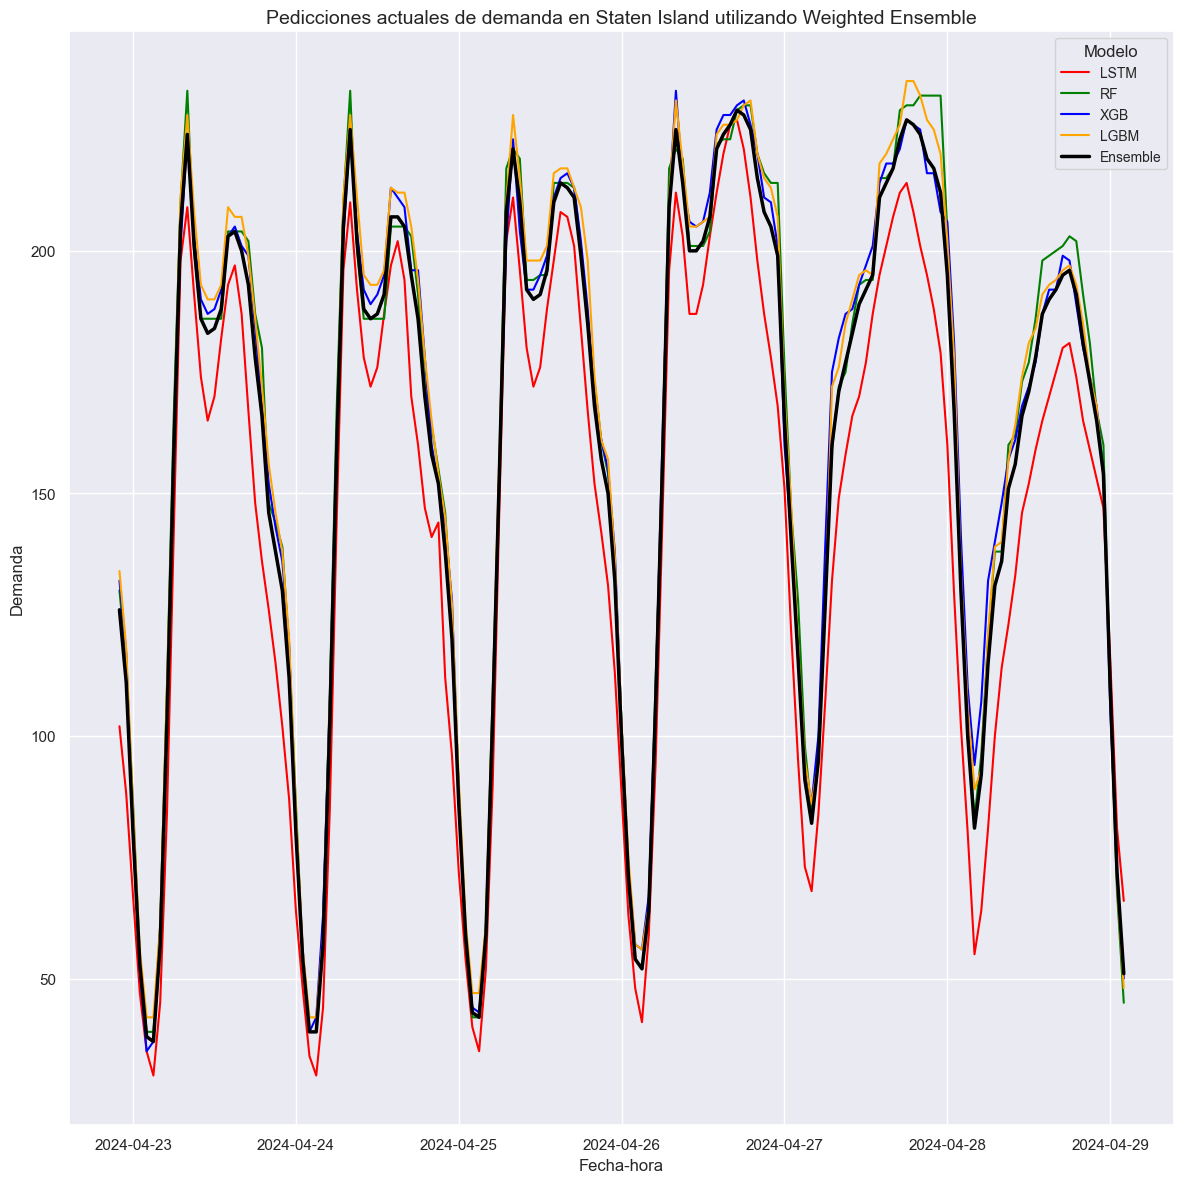

In [37]:
graficar_predicciones(nyc_pred)